In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import sklearn

%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Admission%20Chance.csv')

In [4]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.isnull().sum()

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.shape

(400, 9)

In [15]:
df['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

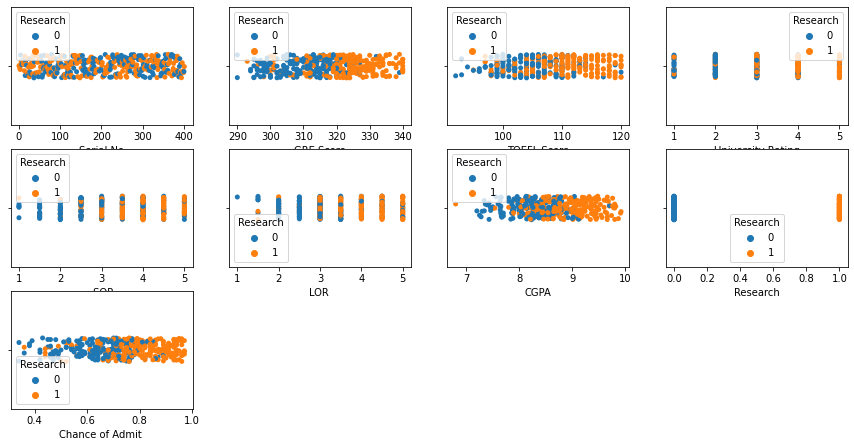

In [16]:
plt.figure(figsize=(15,10))
for id,column in enumerate(df.columns):
  plt.subplot(4,4,id+1)
  sns.stripplot(data=df,x=column,hue='Research')

In [17]:
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
df.head(3)

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [19]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research']]

In [20]:
y = df['Chance of Admit ']

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=100)

In [22]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((300, 7), (100, 7), (300,), (100,))

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.score(x_test,y_test)

0.7932671172280984

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred

array([0.79791861, 0.75123542, 0.86887214, 0.88740065, 0.67981853,
       0.8551971 , 0.6695808 , 0.741691  , 0.90724809, 0.57975108,
       0.69457368, 0.70667246, 0.63689492, 0.67528281, 0.61386438,
       0.66443329, 0.85998519, 0.60546387, 0.57526132, 0.83494154,
       0.63370296, 0.84896148, 0.48570059, 0.80385939, 0.46536879,
       0.74410826, 0.73700911, 0.7820556 , 0.53257386, 0.9622342 ,
       0.8932853 , 0.77623234, 0.72680552, 0.70182944, 0.55599513,
       0.52292335, 0.59336477, 0.73738592, 0.9246229 , 0.47868921,
       0.66536254, 0.64950714, 0.78470815, 0.59331185, 0.77611527,
       0.41044387, 0.61602864, 0.88181705, 0.5554225 , 0.56387583,
       0.93539369, 0.66996503, 0.82675989, 0.80215735, 0.74017671,
       0.85201514, 0.42097999, 0.68838424, 0.77722462, 0.70140605,
       0.81574078, 0.51745689, 0.62876294, 0.81307756, 0.61116844,
       0.73392431, 0.82537772, 0.7120582 , 0.63415419, 0.69590041,
       0.90561254, 0.63746639, 0.74751374, 0.65686048, 0.86338

In [34]:
model.intercept_

-1.250765539248991

In [35]:
model.coef_

array([ 0.00121756,  0.00353782,  0.00683462, -0.00906912,  0.02510426,
        0.12973731,  0.02508733])

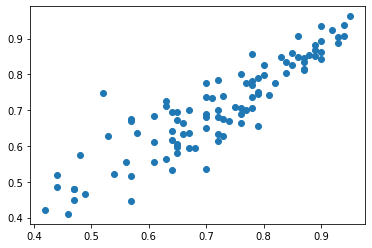

In [37]:
plt.scatter(y_test,y_pred)

In [47]:
#errors
residuals = y_test - y_pred

In [48]:
residuals

248    0.002081
318    0.038765
173    0.021128
285    0.042599
184    0.040181
         ...   
380    0.009636
311    0.006303
110   -0.075124
90    -0.001842
6      0.041661
Name: Chance of Admit , Length: 100, dtype: float64

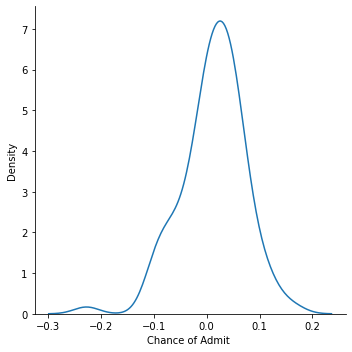

In [50]:
sns.displot(residuals,kind = 'kde')